In [1]:
# enlarge the page the max
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% ! important; }<style>"))

/var/folders/_l/922q143j2tj5f063l0vxr_500000gn/T/ipykernel_92127/4168323316.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [120]:
# import library 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from string import ascii_lowercase
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier, Lasso, ElasticNet, RidgeClassifierCV, LassoCV, ElasticNetCV



In [ ]:
# Load the data
    
uni_r_loc = 'https://raw.githubusercontent.com/elva-liu/dataSeience/refs/heads/main/Loan.csv'
data = pd.read_csv(uni_r_loc)
print(data.head(10))

  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   
5      2018-01-06   37        178310          626    Self-Employed   
6      2018-01-07   58         51250          564         Employed   
7      2018-01-08   49         97345          516         Employed   
8      2018-01-09   34        116841          603         Employed   
9      2018-01-10   46         40615          612         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...  

In [33]:
pd.options.display.memory_usage
pd.options.display.max_info_columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [34]:
data.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

Text(0.5, 1.0, 'Loan Purpose')

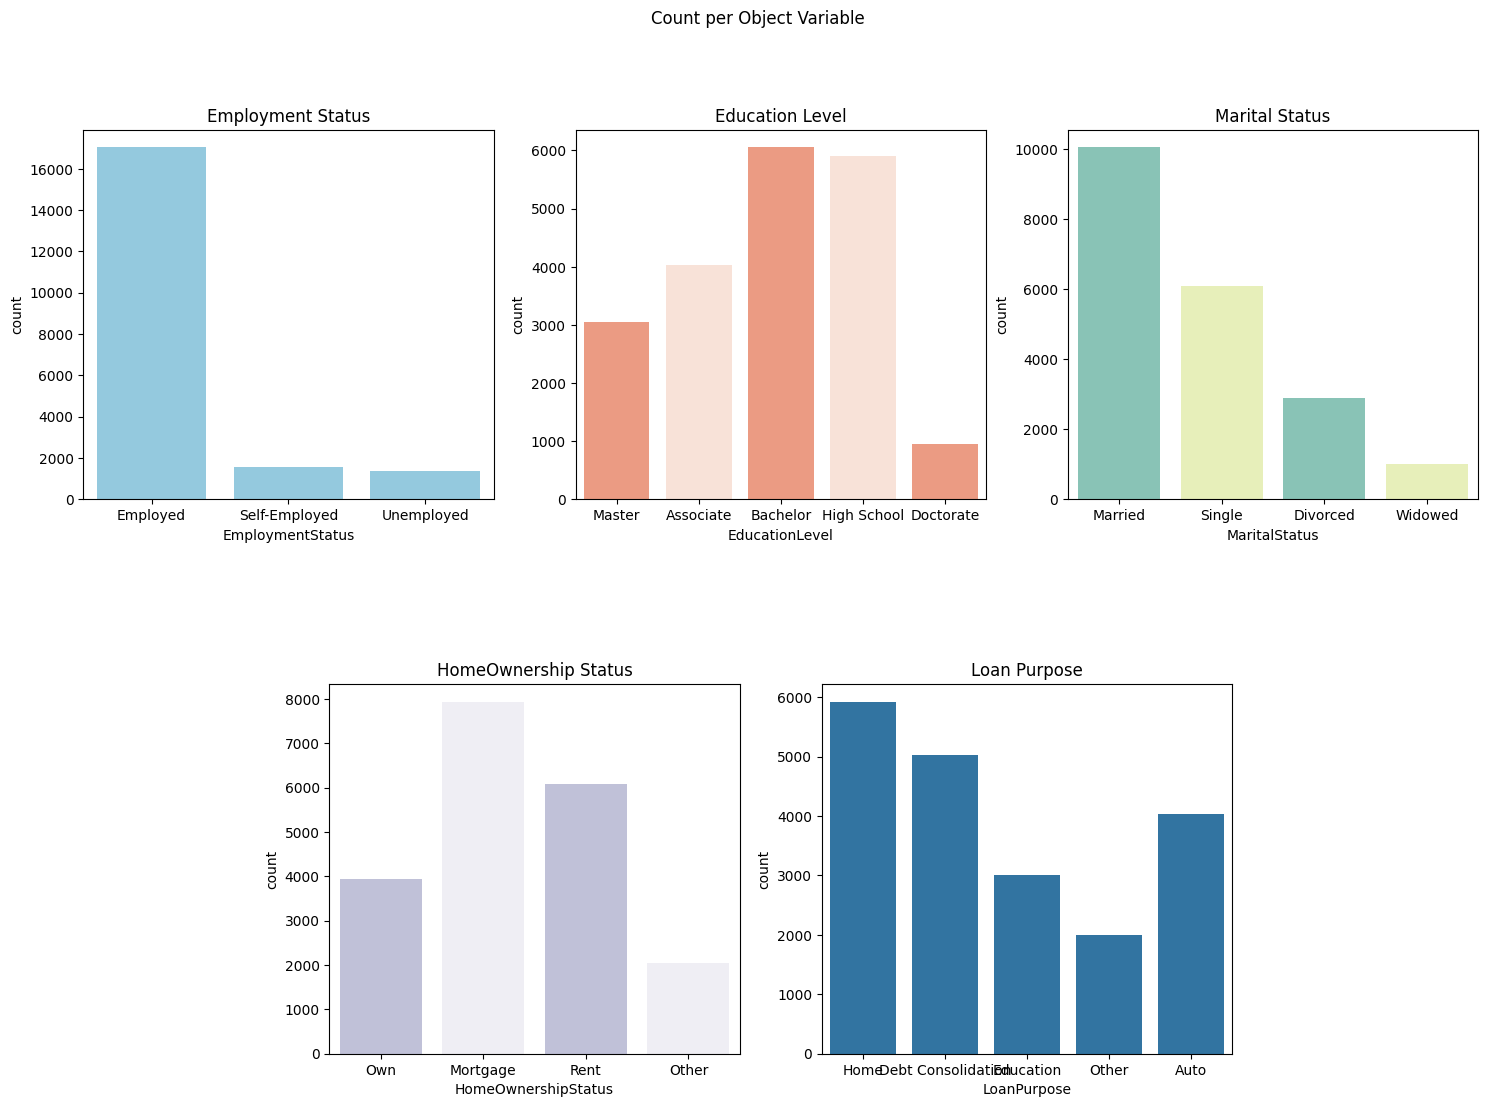

In [35]:
fig = plt.figure(figsize=(18,12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Count per Object Variable')
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
sns.countplot(data=data, x= data.EmploymentStatus, color='skyblue')
plt.title("Employment Status")
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
sns.countplot(data=data, x= data.EducationLevel, palette=["#fc9272","#fee0d2"])
plt.title("Education Level")
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
sns.countplot(data=data, x= data.MaritalStatus, palette= ["#7fcdbb","#edf8b1"])
plt.title("Marital Status")
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
sns.countplot(data=data, x= data.HomeOwnershipStatus, palette=["#bcbddc", "#efedf5"])
plt.title("HomeOwnership Status")
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
sns.countplot(data=data, x= data.LoanPurpose, )
plt.title("Loan Purpose")

Text(0.5, 1.0, 'Credit Score')

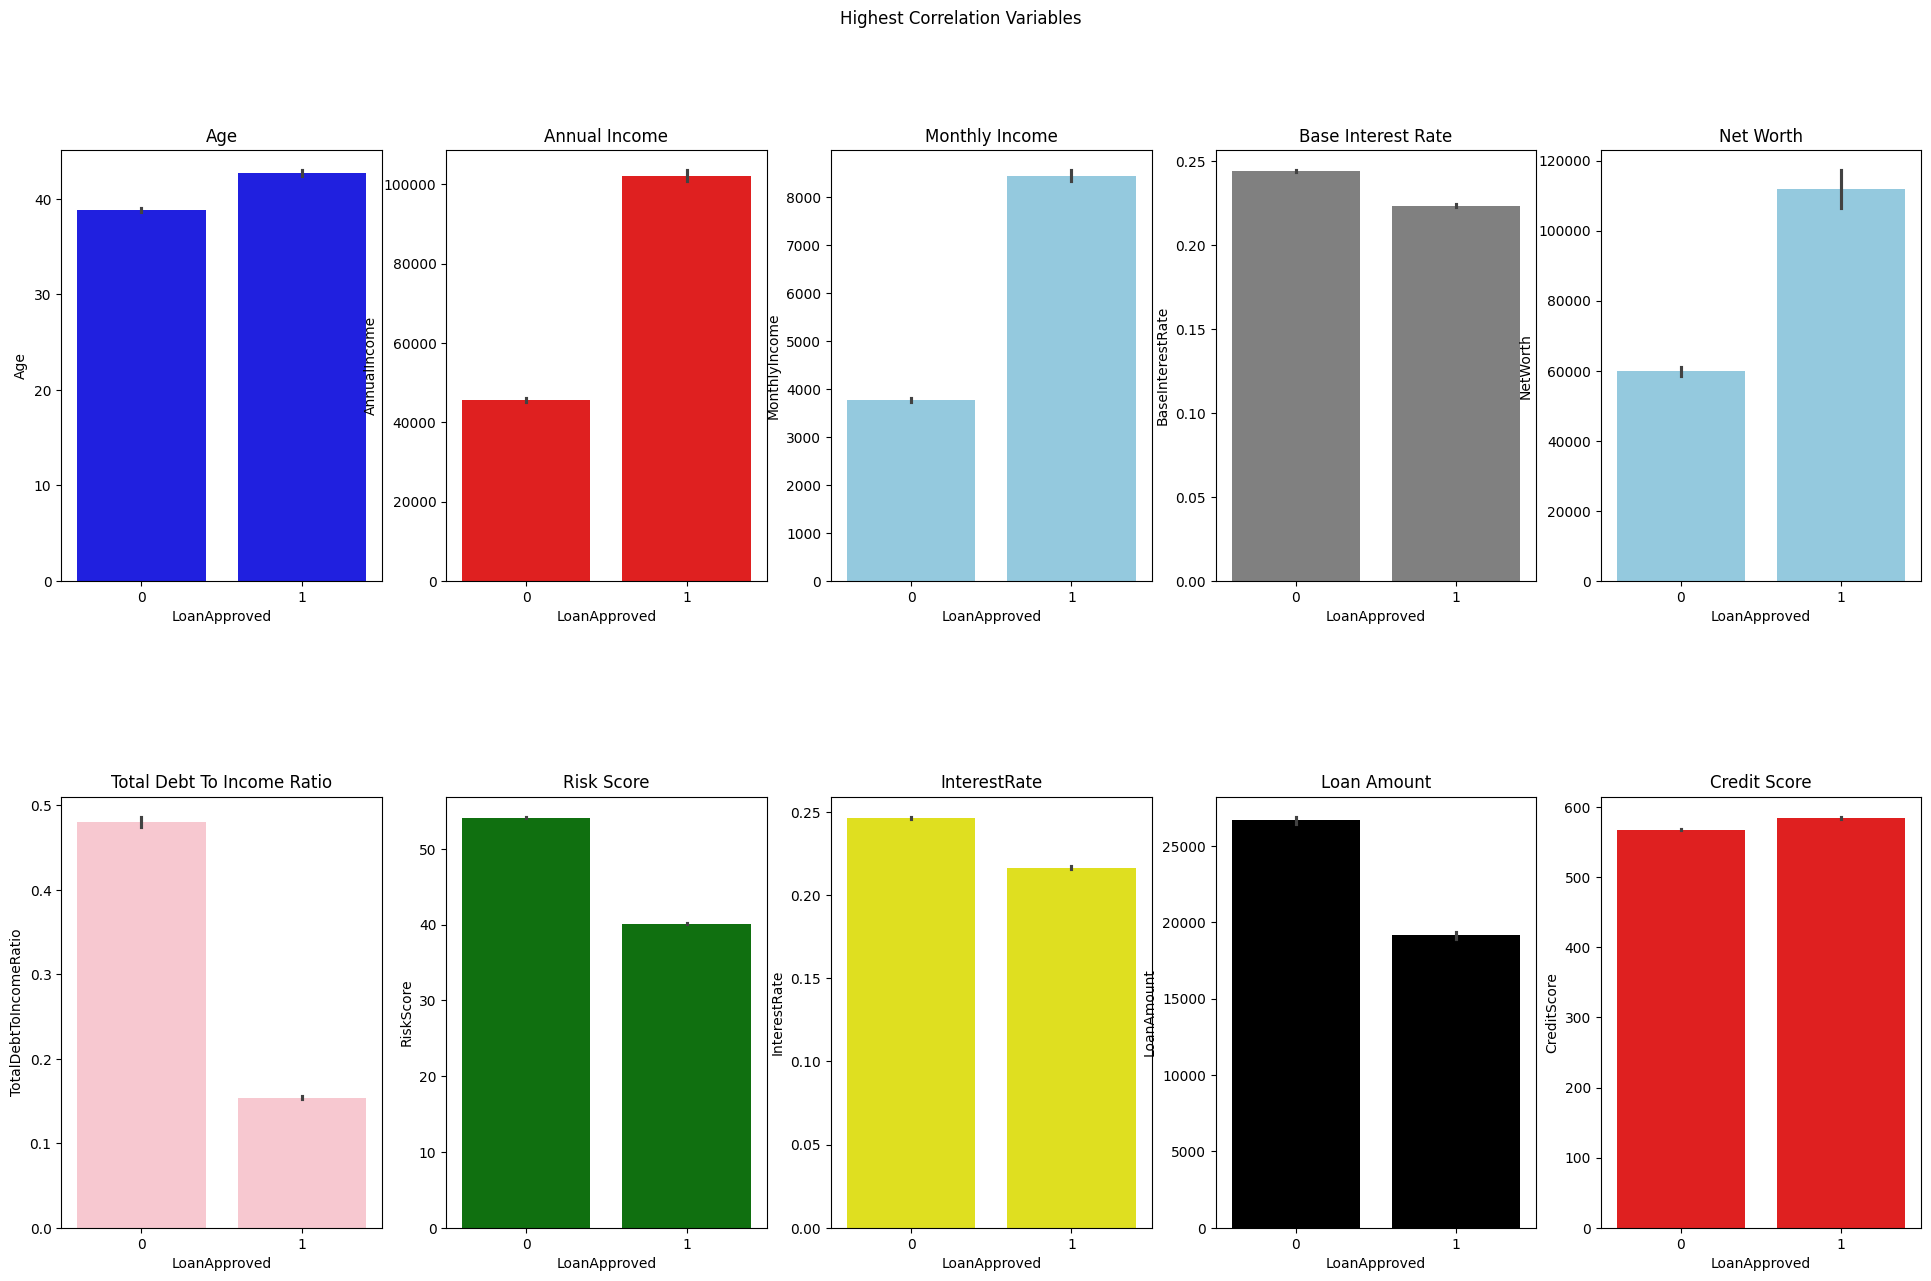

In [36]:
fig = plt.figure(figsize=(24,14))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Highest Correlation Variables')
ax1 = plt.subplot2grid(shape=(2,10), loc=(0,0), colspan=2)
sns.barplot(data=data,x='LoanApproved', y='Age',color='blue')
plt.title("Age")
ax2 = plt.subplot2grid((2,10), (0,2), colspan=2)
sns.barplot(data=data,x='LoanApproved', y='AnnualIncome',color='red')
plt.title("Annual Income")
ax3 = plt.subplot2grid((2,10), (0,4), colspan=2)
sns.barplot(data=data,x='LoanApproved', y='MonthlyIncome',color='skyblue')
plt.title("Monthly Income")
ax4 = plt.subplot2grid((2,10), (0,6), colspan=2)
sns.barplot(data=data,x='LoanApproved', y='BaseInterestRate',color='grey')
plt.title("Base Interest Rate")
ax5 = plt.subplot2grid((2,10), (0,8), colspan=2)
sns.barplot(data=data,x='LoanApproved', y='NetWorth',color='skyblue')
plt.title("Net Worth")


ax6 = plt.subplot2grid((2,10), (1,0), colspan=2)
sns.barplot(data=data,x='LoanApproved', y='TotalDebtToIncomeRatio',color='pink')
plt.title("Total Debt To Income Ratio")
ax7 = plt.subplot2grid((2,10), (1,2), colspan=2)
sns.barplot(data=data,x='LoanApproved', y='RiskScore',color='green')
plt.title("Risk Score")
ax8 = plt.subplot2grid((2,10), (1,4), colspan=2)
sns.barplot(data=data,x='LoanApproved', y='InterestRate',color='yellow')
plt.title("InterestRate")
ax9 = plt.subplot2grid((2,10), (1,6), colspan=2)
sns.barplot(data=data,x='LoanApproved', y='LoanAmount',color='black')
plt.title("Loan Amount")
ax10 = plt.subplot2grid((2,10), (1,8), colspan=2)
sns.barplot(data=data,x='LoanApproved', y='CreditScore',color='red')
plt.title("Credit Score")

In [37]:
data.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [38]:
from sklearn.preprocessing import LabelEncoder

N_LoanPurpose = LabelEncoder().fit_transform(data['LoanPurpose'])
data.drop("LoanPurpose", axis=1, inplace=True)
data["LoanPurpose"] = N_LoanPurpose

N_HomeOwnershipStatus = LabelEncoder().fit_transform(data['HomeOwnershipStatus'])
data.drop("HomeOwnershipStatus", axis=1, inplace=True)
data["HomeOwnershipStatus"] = N_HomeOwnershipStatus

N_MaritalStatus = LabelEncoder().fit_transform(data['MaritalStatus'])
data.drop("MaritalStatus", axis=1, inplace=True)
data["MaritalStatus"] = N_MaritalStatus

N_EducationLevel = LabelEncoder().fit_transform(data['EducationLevel'])
data.drop("EducationLevel", axis=1, inplace=True)
data["EducationLevel"] = N_EducationLevel

N_EmploymentStatus = LabelEncoder().fit_transform(data['EmploymentStatus'])
data.drop("EmploymentStatus", axis=1, inplace=True)
data["EmploymentStatus"] = N_EmploymentStatus

from datetime import datetime
data['ApplicationDate'] = pd.to_datetime(data['ApplicationDate'], format='%Y-%m-%d')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ApplicationDate             20000 non-null  datetime64[ns]
 1   Age                         20000 non-null  int64         
 2   AnnualIncome                20000 non-null  int64         
 3   CreditScore                 20000 non-null  int64         
 4   Experience                  20000 non-null  int64         
 5   LoanAmount                  20000 non-null  int64         
 6   LoanDuration                20000 non-null  int64         
 7   NumberOfDependents          20000 non-null  int64         
 8   MonthlyDebtPayments         20000 non-null  int64         
 9   CreditCardUtilizationRate   20000 non-null  float64       
 10  NumberOfOpenCreditLines     20000 non-null  int64         
 11  NumberOfCreditInquiries     20000 non-null  int64     

In [39]:
#correlation analysis
target_variable = 'LoanApproved'
# calculate the correlation of each variable with y
correlation_with_y = data.corr()[target_variable].abs()

threshold = 0.1 # correlation higher than 10%
high_corr_with_y = correlation_with_y[correlation_with_y > threshold].drop(target_variable)
print(high_corr_with_y.sort_values())

LengthOfCreditHistory     0.105949
Experience                0.140755
Age                       0.141029
CreditScore               0.142000
TotalAssets               0.184011
MonthlyLoanPayment        0.184272
NetWorth                  0.187892
LoanAmount                0.239496
BaseInterestRate          0.247263
InterestRate              0.301646
TotalDebtToIncomeRatio    0.410399
AnnualIncome              0.597900
MonthlyIncome             0.604101
RiskScore                 0.766137
Name: LoanApproved, dtype: float64


In [40]:
new_data = pd.DataFrame()
new_data['LengthOfCreditHistory']=data['LengthOfCreditHistory']
new_data['Experience']=data['Experience']
new_data['Age']=data['Age']
new_data['CreditScore']=data['CreditScore']
new_data['TotalAssets']=data['TotalAssets']
new_data['MonthlyLoanPayment']=data['MonthlyLoanPayment']
new_data['NetWorth']=data['NetWorth']
new_data['LoanAmount']=data['LoanAmount']
new_data['BaseInterestRate']=data['BaseInterestRate']
new_data['InterestRate']=data['InterestRate']
new_data['TotalDebtToIncomeRatio']=data['TotalDebtToIncomeRatio']
new_data['AnnualIncome']=data['AnnualIncome']
new_data['MonthlyIncome']=data['MonthlyIncome']
new_data['RiskScore']=data['RiskScore']
new_data

,LengthOfCreditHistory,Experience,Age,CreditScore,TotalAssets,MonthlyLoanPayment,NetWorth,LoanAmount,BaseInterestRate,InterestRate,TotalDebtToIncomeRatio,AnnualIncome,MonthlyIncome,RiskScore
0,9,22,45,617,146111,419.805992,126928,13152,0.199652,0.227590,0.181077,39948,3329.000000,49.0
1,9,15,38,628,53204,794.054238,43609,26045,0.207045,0.201077,0.389852,39709,3309.083333,52.0
2,22,26,47,570,25176,666.406688,5205,17627,0.217627,0.212548,0.462157,40724,3393.666667,52.0
3,10,34,58,545,104822,1047.506980,99452,37898,0.300398,0.300911,0.313098,69084,5757.000000,54.0
4,27,17,37,594,244305,330.179140,227019,9184,0.197184,0.175990,0.070210,103264,8605.333333,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7,19,44,587,80969,905.767712,55327,24521,0.216021,0.195574,0.627741,30180,2515.000000,55.0
19996,28,33,56,567,69571,958.395633,64002,25818,0.227318,0.199168,0.334418,49246,4103.833333,54.0
19997,8,20,44,645,108316,945.427454,103663,37033,0.229533,0.226766,0.357227,48958,4079.833333,45.0
19998,13,36,60,560,22085,411.168284,10600,14760,0.249760,0.264873,0.408678,41025,3418.750000,59.0


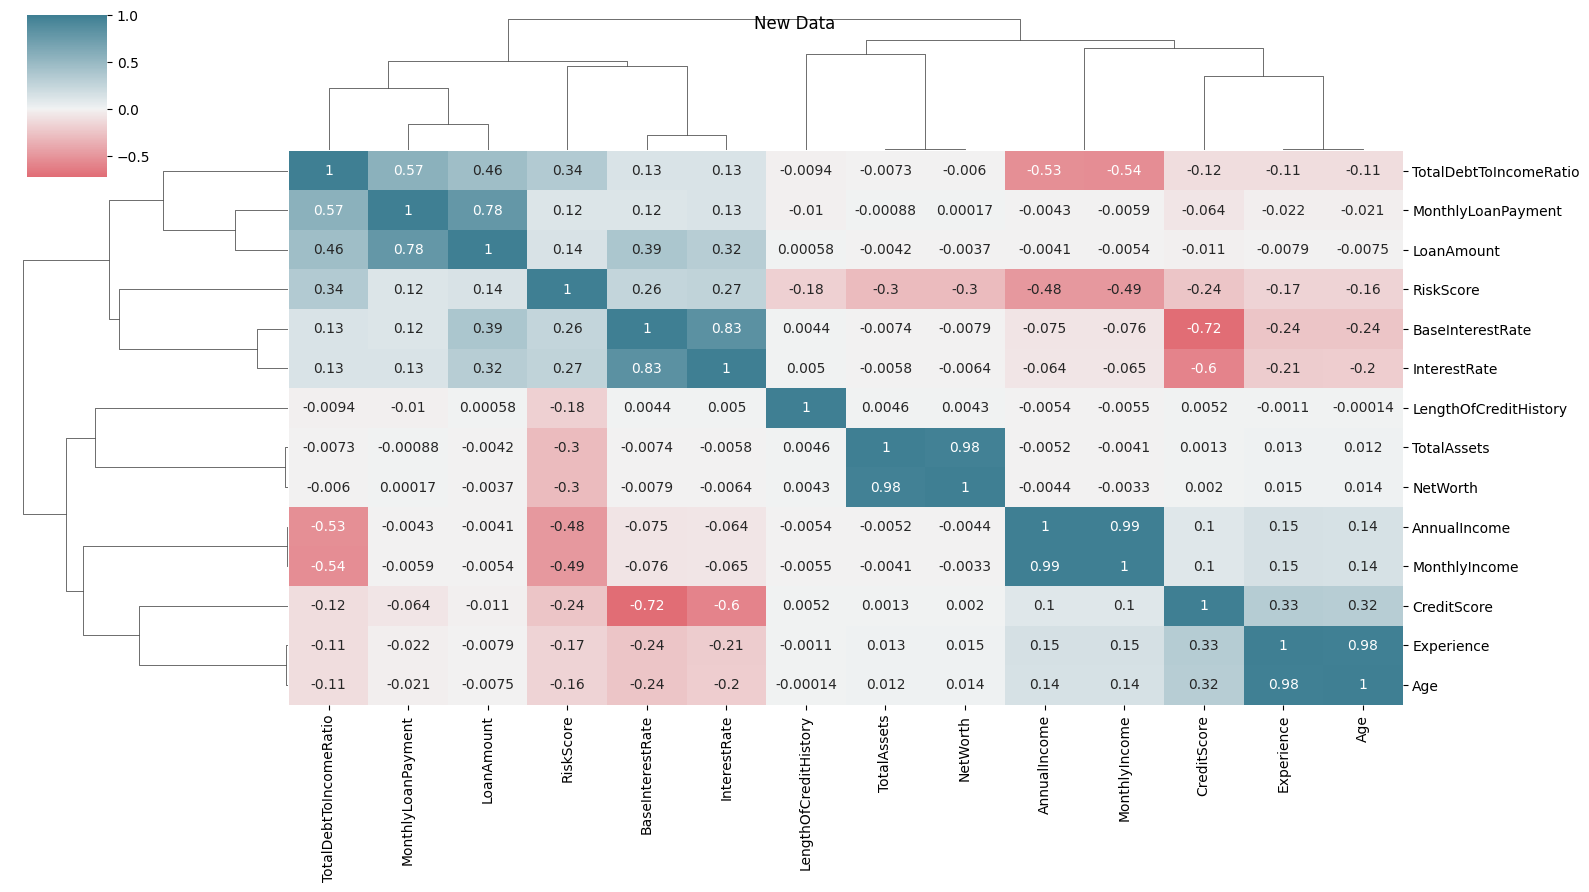

In [41]:
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.clustermap(new_data.corr(), figsize=(16,9),annot=True, cmap=cmap, center=0).fig.suptitle("New Data");



In [42]:
df_data = pd.DataFrame()

df_data['CreditScore']=data['CreditScore']
df_data['TotalAssets']=data['TotalAssets']
df_data['LoanAmount']=data['LoanAmount']
df_data['InterestRate']=data['InterestRate']
df_data['AnnualIncome']=data['AnnualIncome']
df_data['RiskScore']=data['RiskScore']

df_data['(y) Loan Approved']=data['LoanApproved']


df_data

,CreditScore,TotalAssets,LoanAmount,InterestRate,AnnualIncome,RiskScore,(y) Loan Approved
0,617,146111,13152,0.227590,39948,49.0,0
1,628,53204,26045,0.201077,39709,52.0,0
2,570,25176,17627,0.212548,40724,52.0,0
3,545,104822,37898,0.300911,69084,54.0,0
4,594,244305,9184,0.175990,103264,36.0,1
...,...,...,...,...,...,...,...
19995,587,80969,24521,0.195574,30180,55.0,0
19996,567,69571,25818,0.199168,49246,54.0,0
19997,645,108316,37033,0.226766,48958,45.0,0
19998,560,22085,14760,0.264873,41025,59.0,0


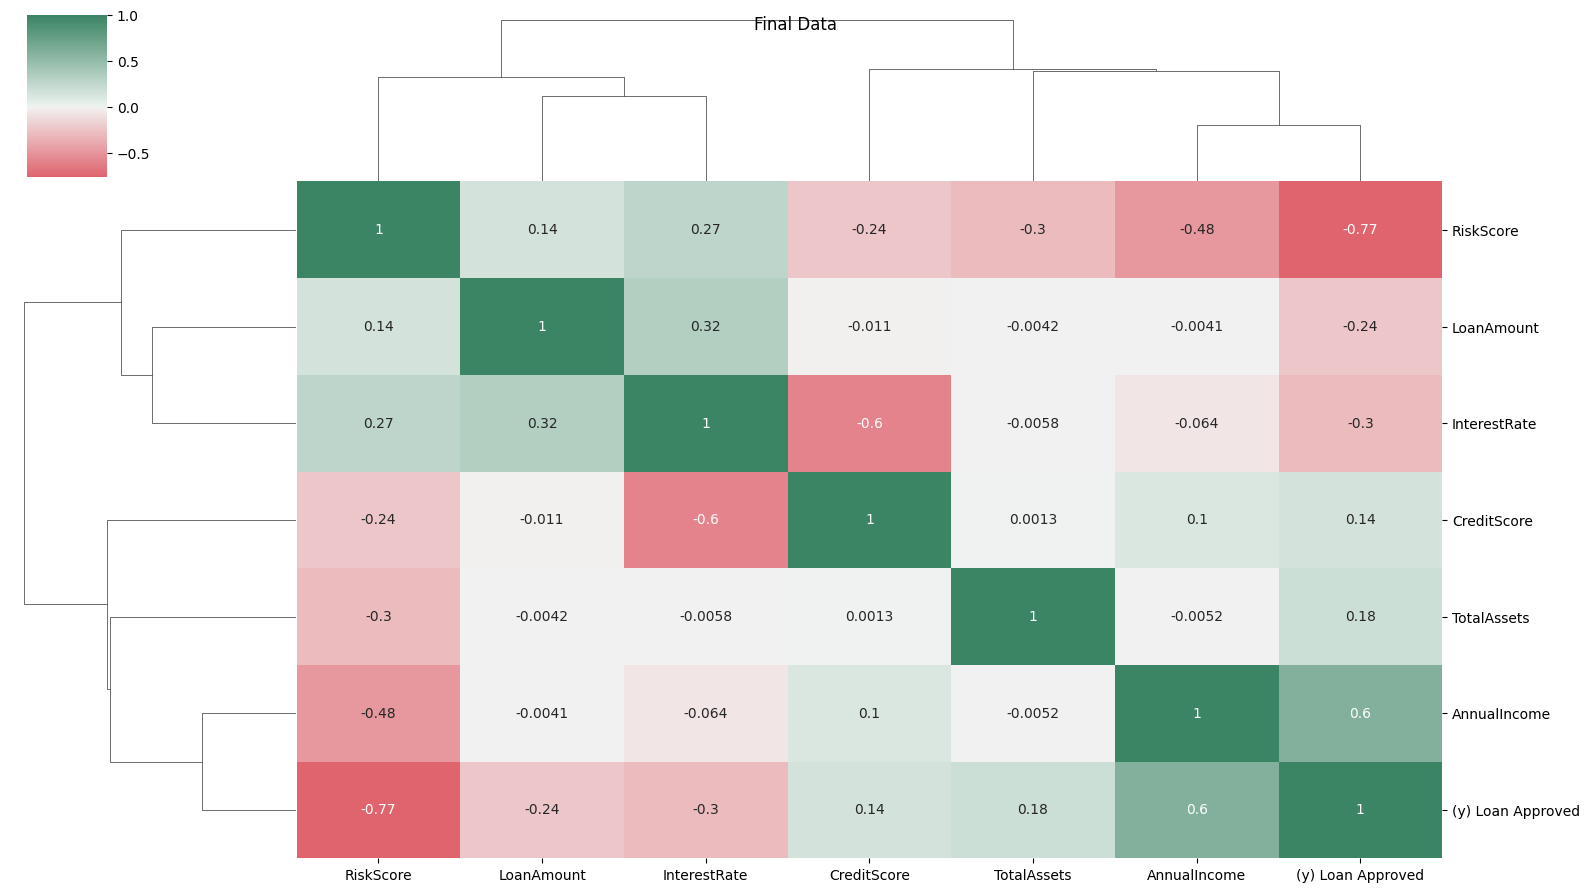

In [43]:
cmap = sns.diverging_palette(10, 150, as_cmap=True)
sns.clustermap(df_data.corr(), figsize=(16,9),annot=True, cmap=cmap, center=0).fig.suptitle("Final Data");
# Save the figure to PNG
fig = plt.gcf()
fig.savefig('/Users/elvaliu/Classes/python_project/780_assignment_shinny/core.png', dpi=300)

plt.show()

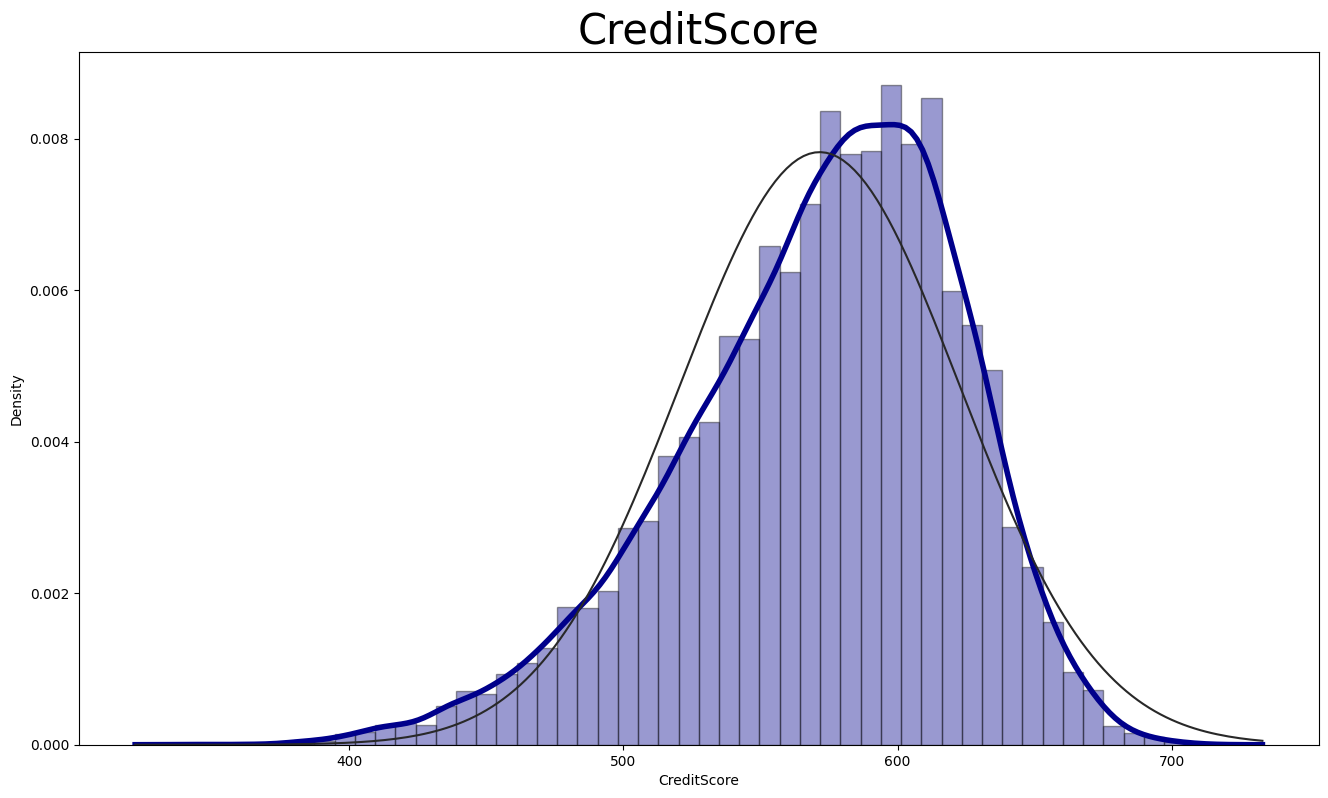

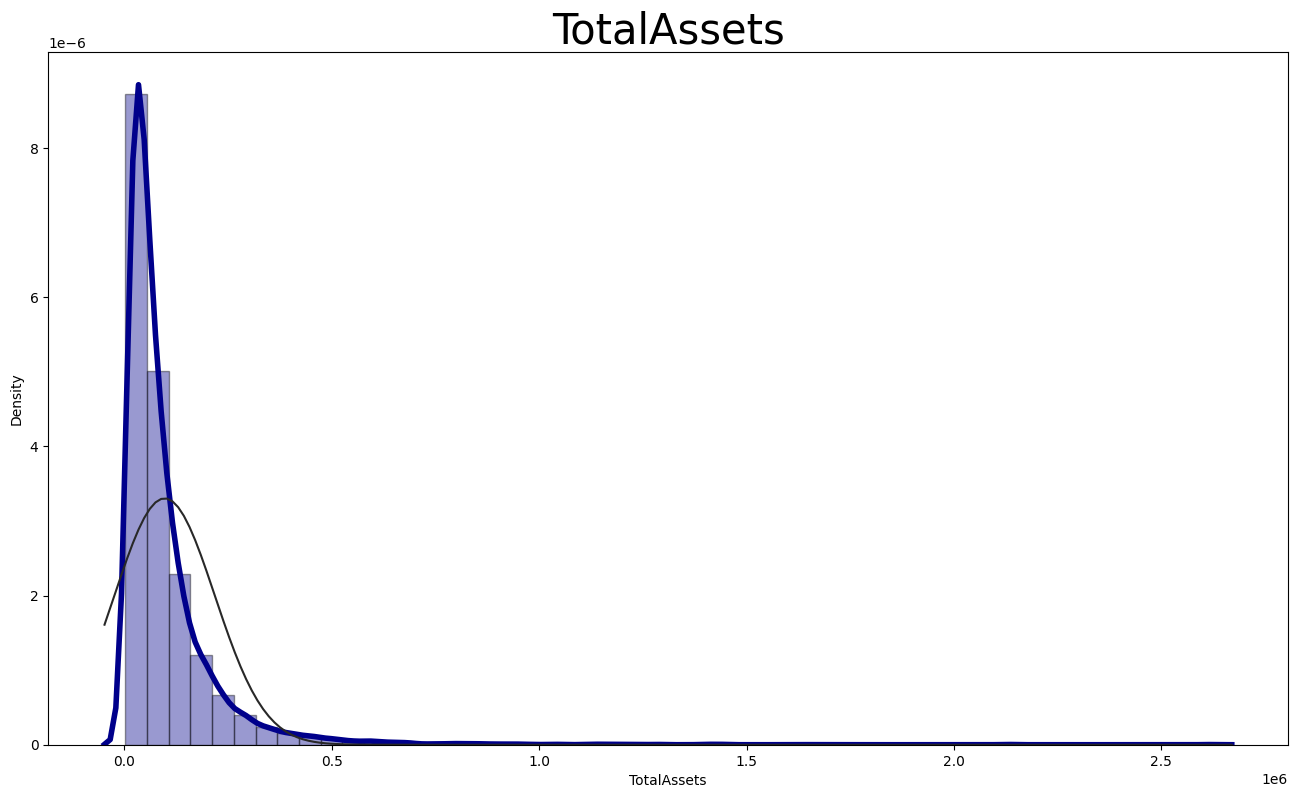

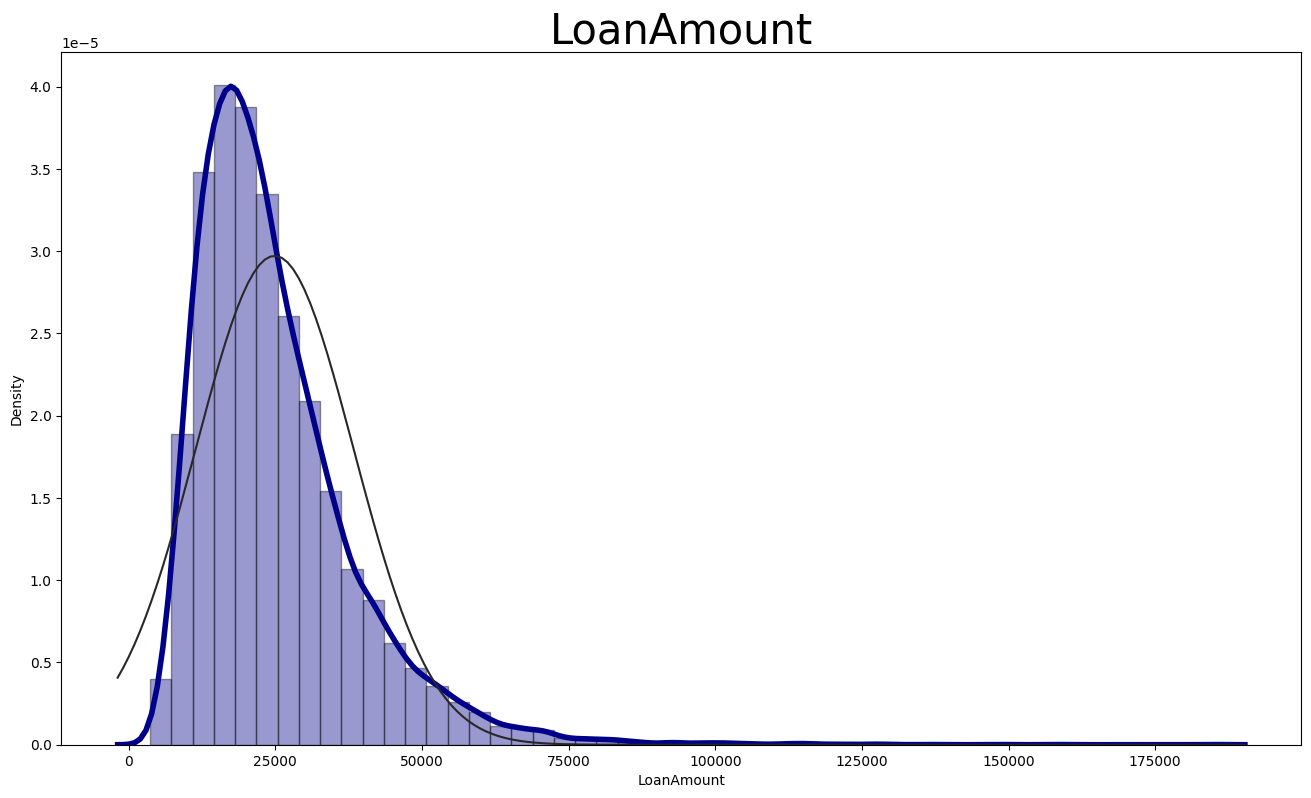

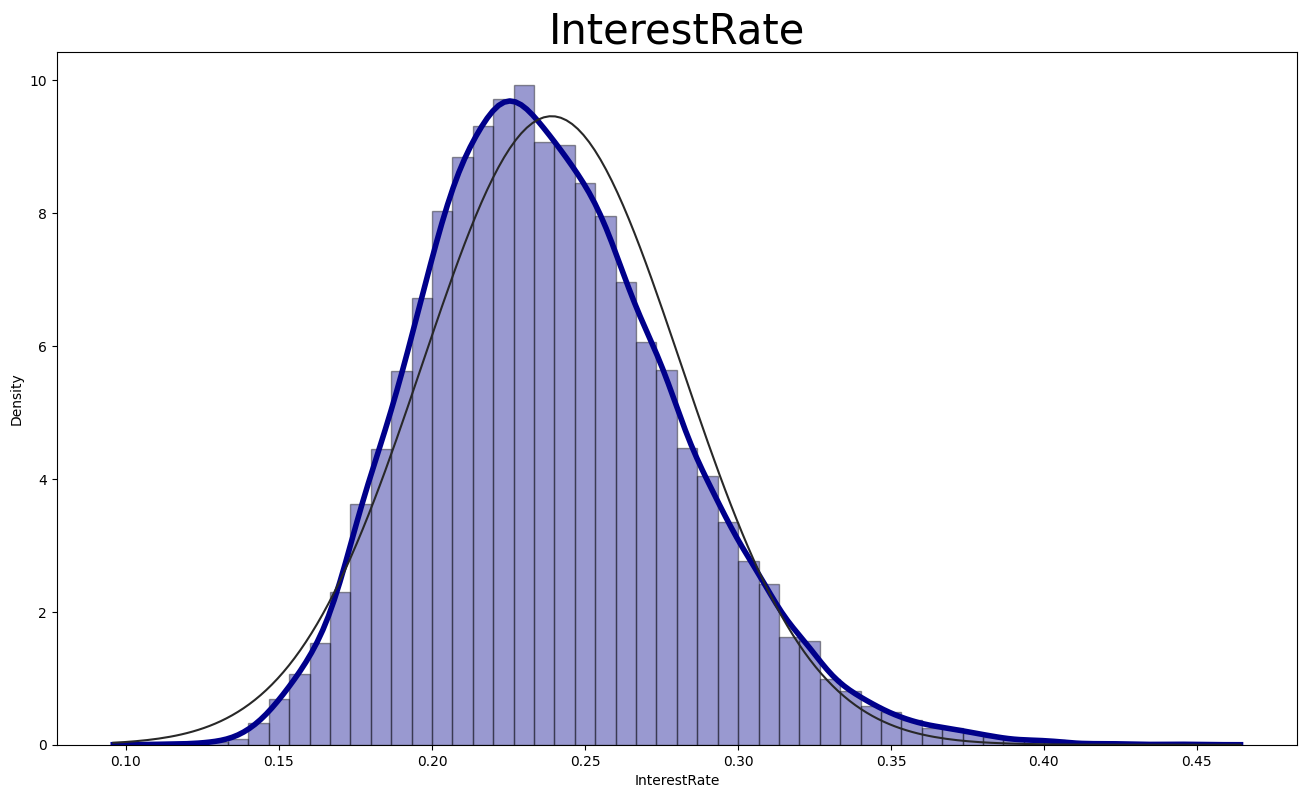

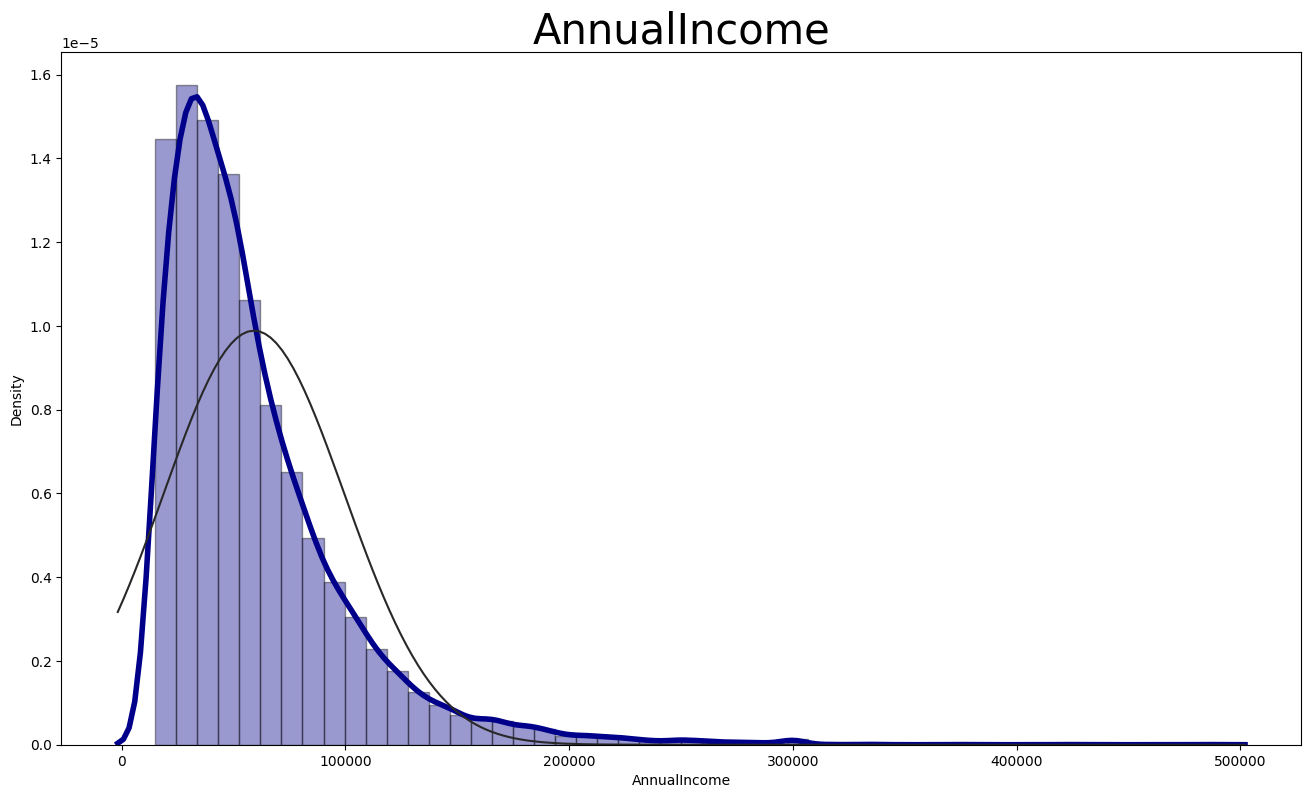

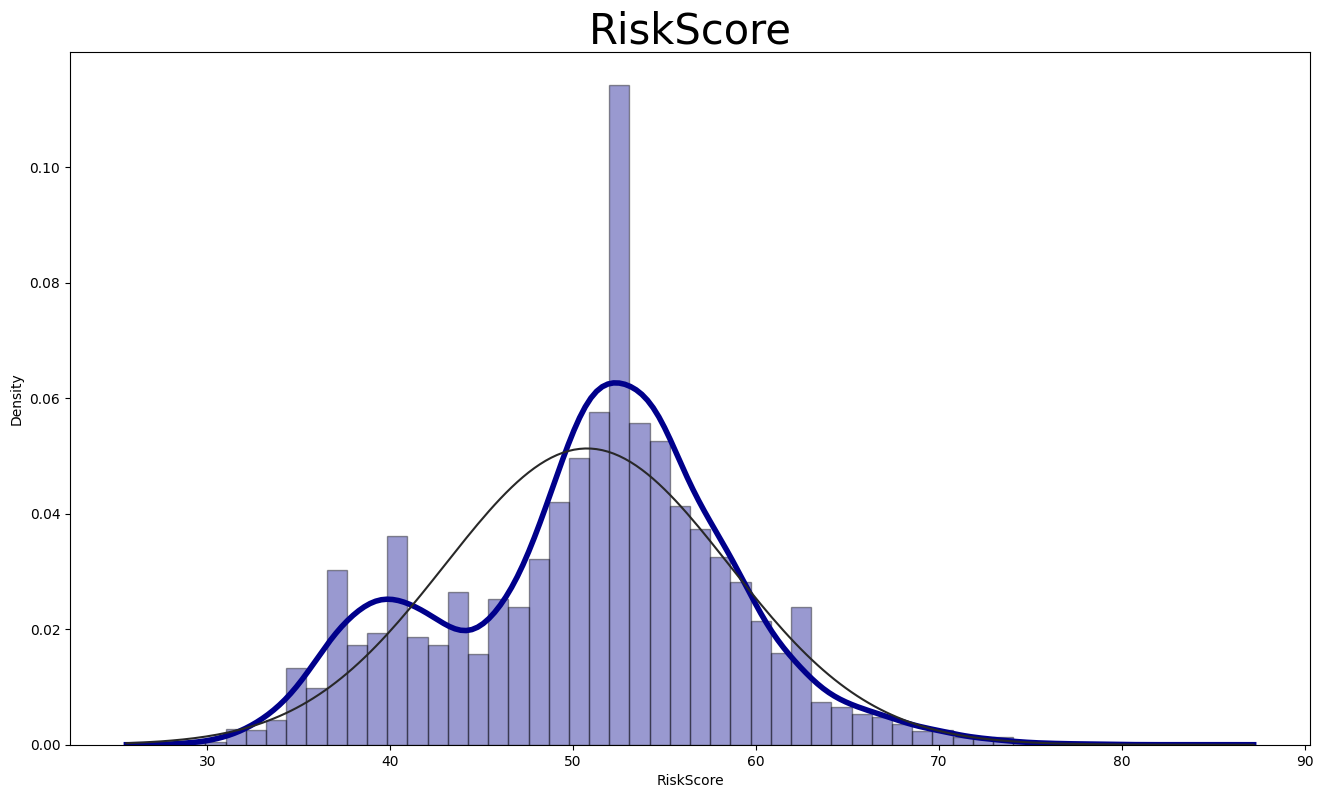

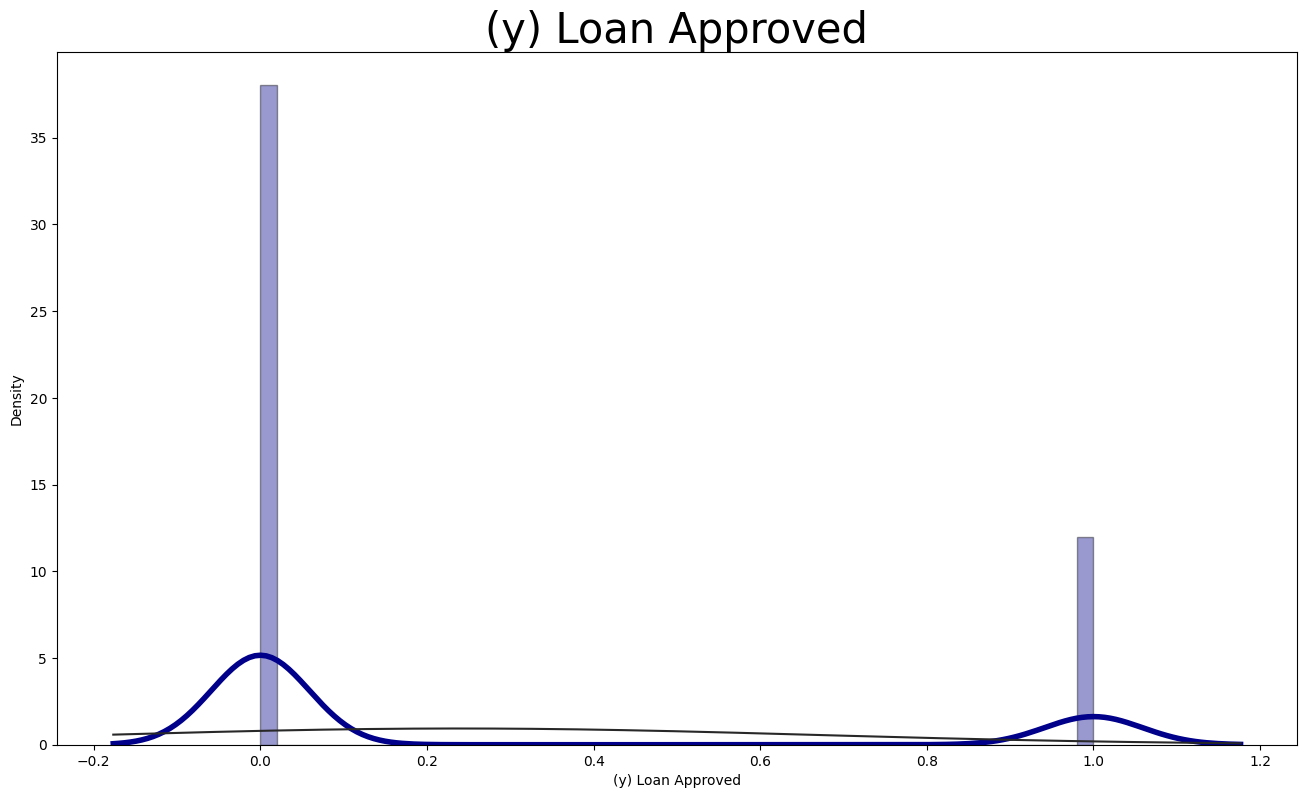

In [44]:

for column in df_data.columns:
    a4_dims = (16, 9)
    fig, axy = plt.subplots(figsize=a4_dims)
    sns.distplot(df_data[column], fit=norm,hist=True, kde=True, color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4}).set_title(f'{column}', fontdict = { 'fontsize': 30})
    

In [19]:
# Skewness of the data
df_data.skew(axis =0)

CreditScore         -0.596727
TotalAssets          5.311326
LoanAmount           1.833688
InterestRate         0.485491
AnnualIncome         2.088948
RiskScore           -0.162062
(y) Loan Approved    1.224086
log_x TotalAssets    0.044245
dtype: float64

In [ ]:
# Rationality behinf the IQR (Interquartile Range) method is robust all variable present a non-normal distributions (see results above)

In [20]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

for column in df_data.columns:
    # Show Variable / column Name 
    print(f"Variable: {column}")
    
    # function
    column_out = find_outliers_IQR(df_data[column])
    
    print('Number of outliers: '+ str(len(column_out)))

Variable: CreditScore
Number of outliers: 242
Variable: TotalAssets
Number of outliers: 1442
Variable: LoanAmount
Number of outliers: 746
Variable: InterestRate
Number of outliers: 222
Variable: AnnualIncome
Number of outliers: 947
Variable: RiskScore
Number of outliers: 94
Variable: (y) Loan Approved
Number of outliers: 4780
Variable: log_x TotalAssets
Number of outliers: 96


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_outliers(df):
    """
    Analyze outliers in a DataFrame using the IQR method and visualize with box plots.
    
    Parameters:
    - df: pandas DataFrame to analyze
    
    Returns:
    - dict: A dictionary where keys are column names and values are lists of outlier indices
    """
    outliers = {}
    
    # Loop through each numeric column
    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        column_outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers[column] = column_outliers.index.tolist()

        # Visualization of each column
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column} - Showing Outliers')
        plt.show()

    return outliers

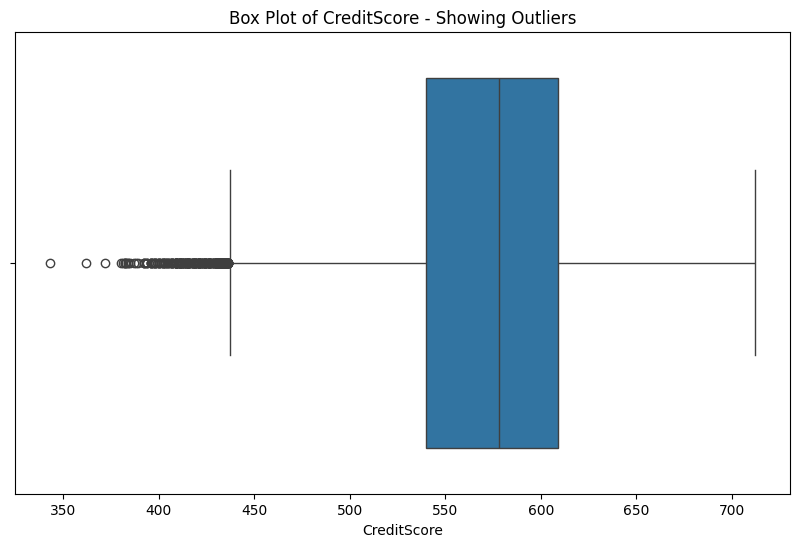

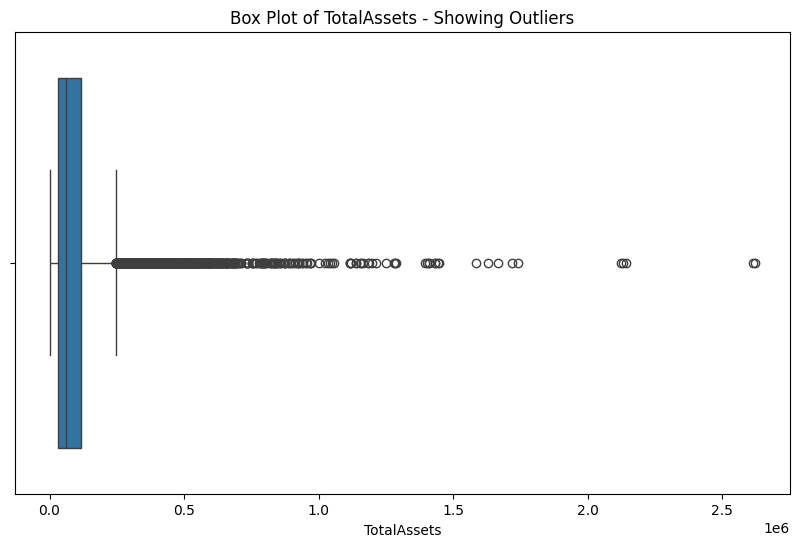

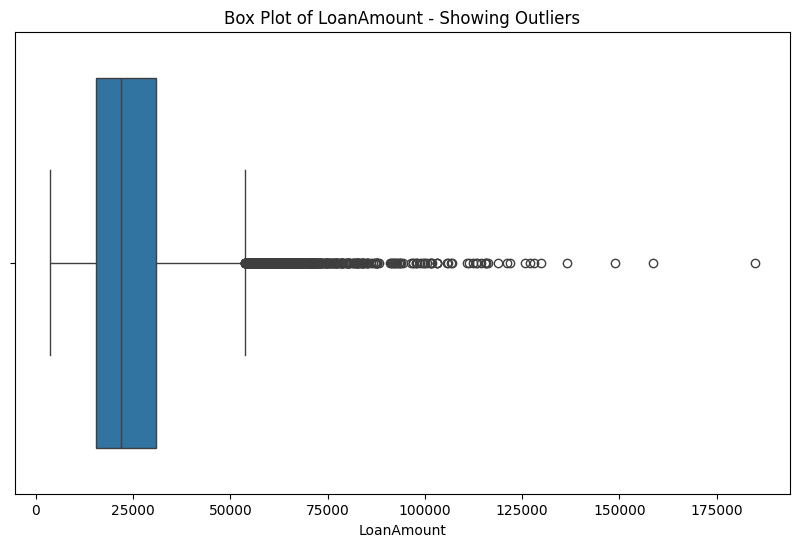

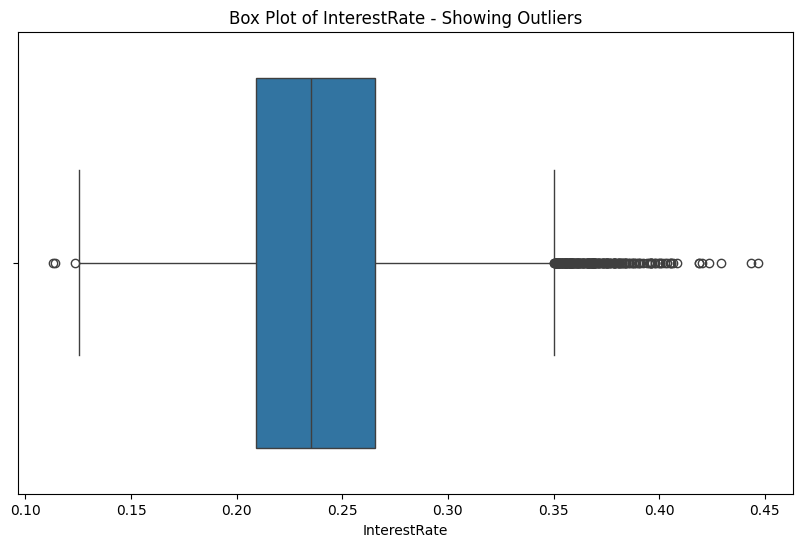

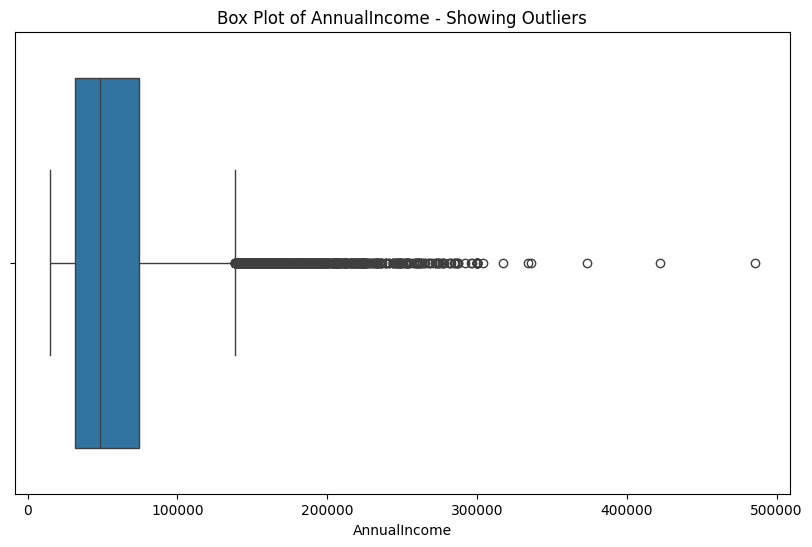

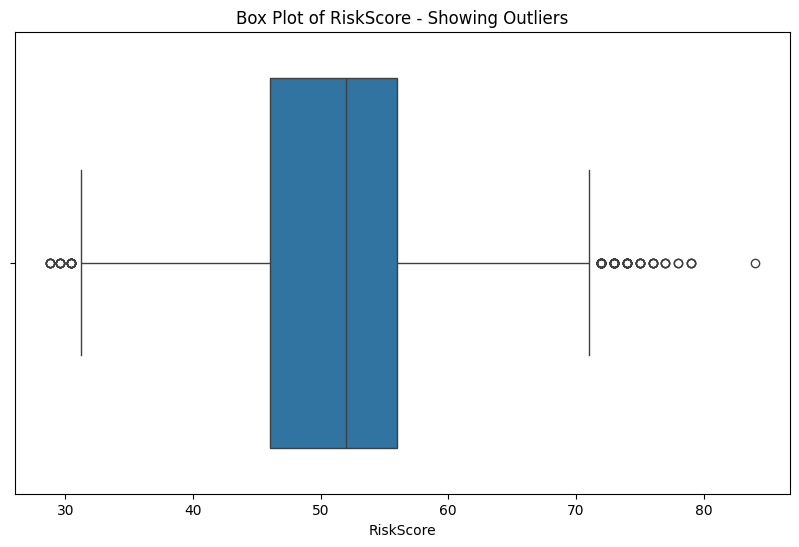

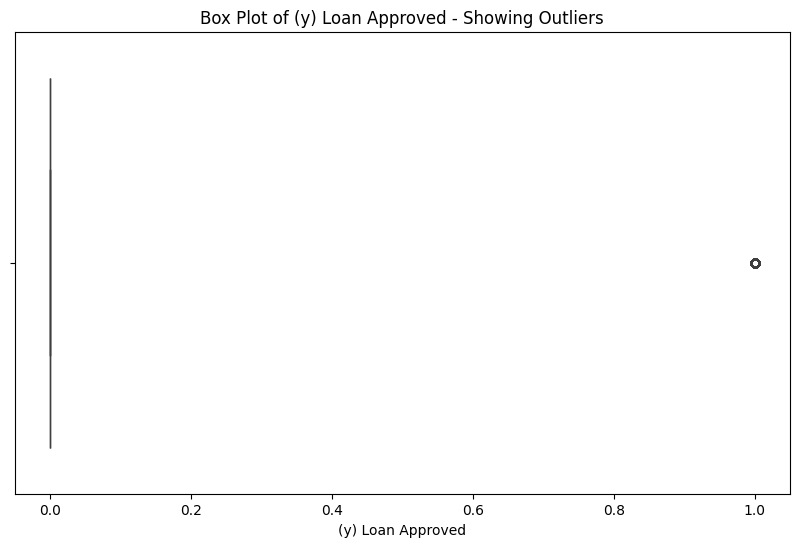

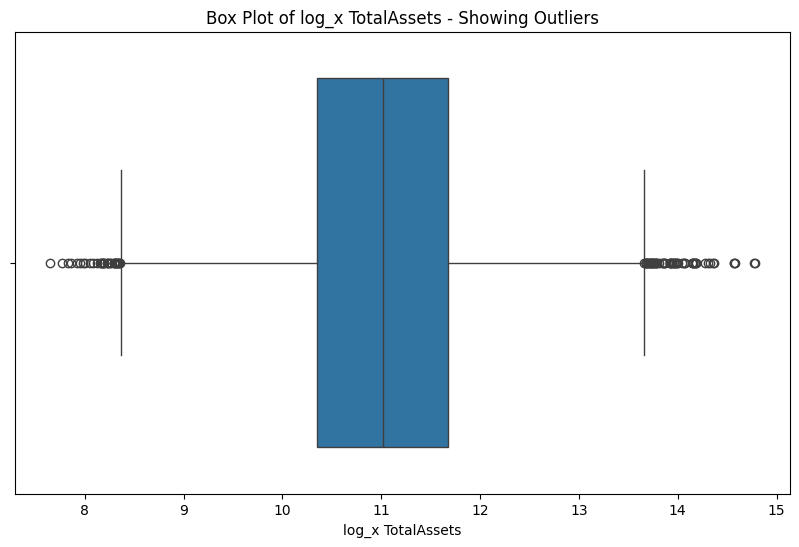

Outliers in CreditScore: 242
Outliers in TotalAssets: 1442
Outliers in LoanAmount: 746
Outliers in InterestRate: 222
Outliers in AnnualIncome: 947
Outliers in RiskScore: 94
Outliers in (y) Loan Approved: 4780
Outliers in log_x TotalAssets: 96


In [22]:
outlier_indices = analyze_outliers(df_data)
# 
# Print out the outliers for each column
for column, indices in outlier_indices.items():
    print(f"Outliers in {column}: {len(indices)}")

Text(0.5, 1.0, 'log_AnnualIncome')

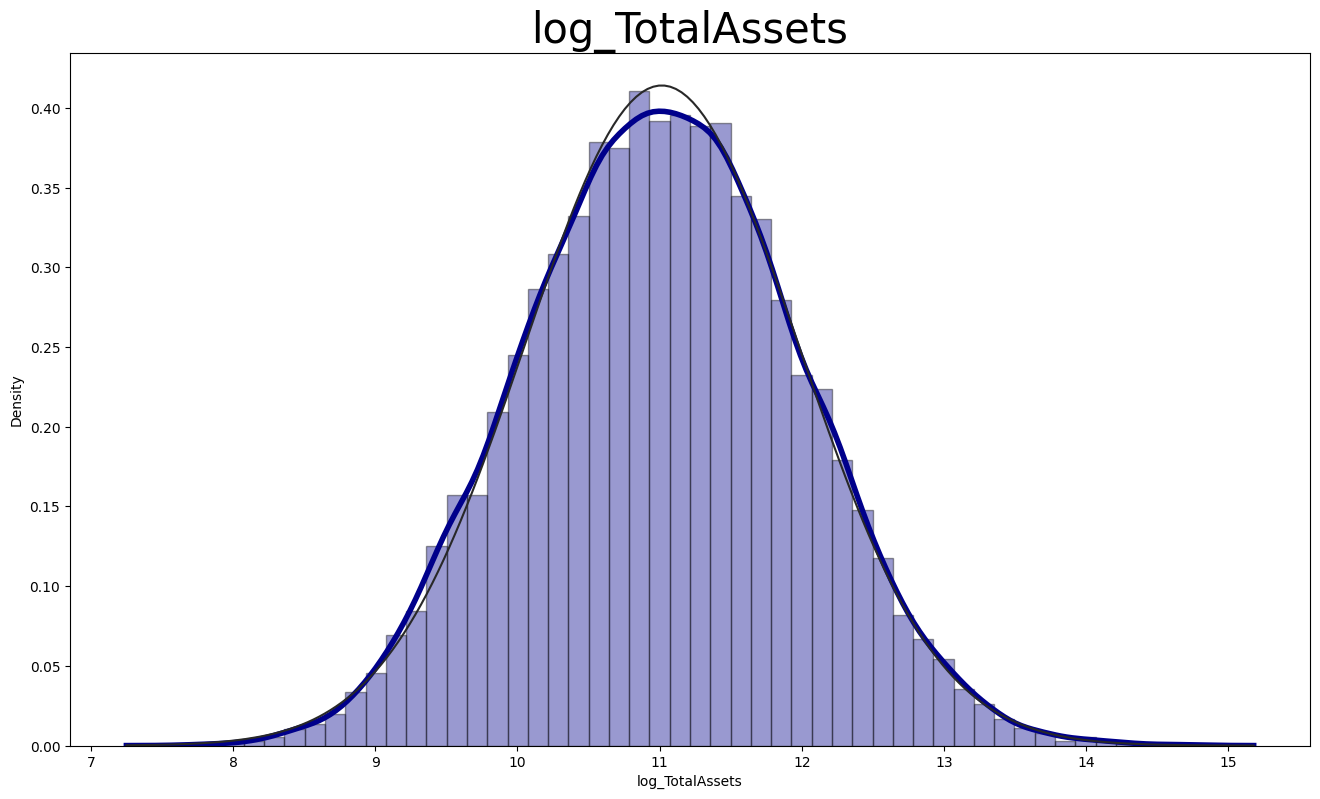

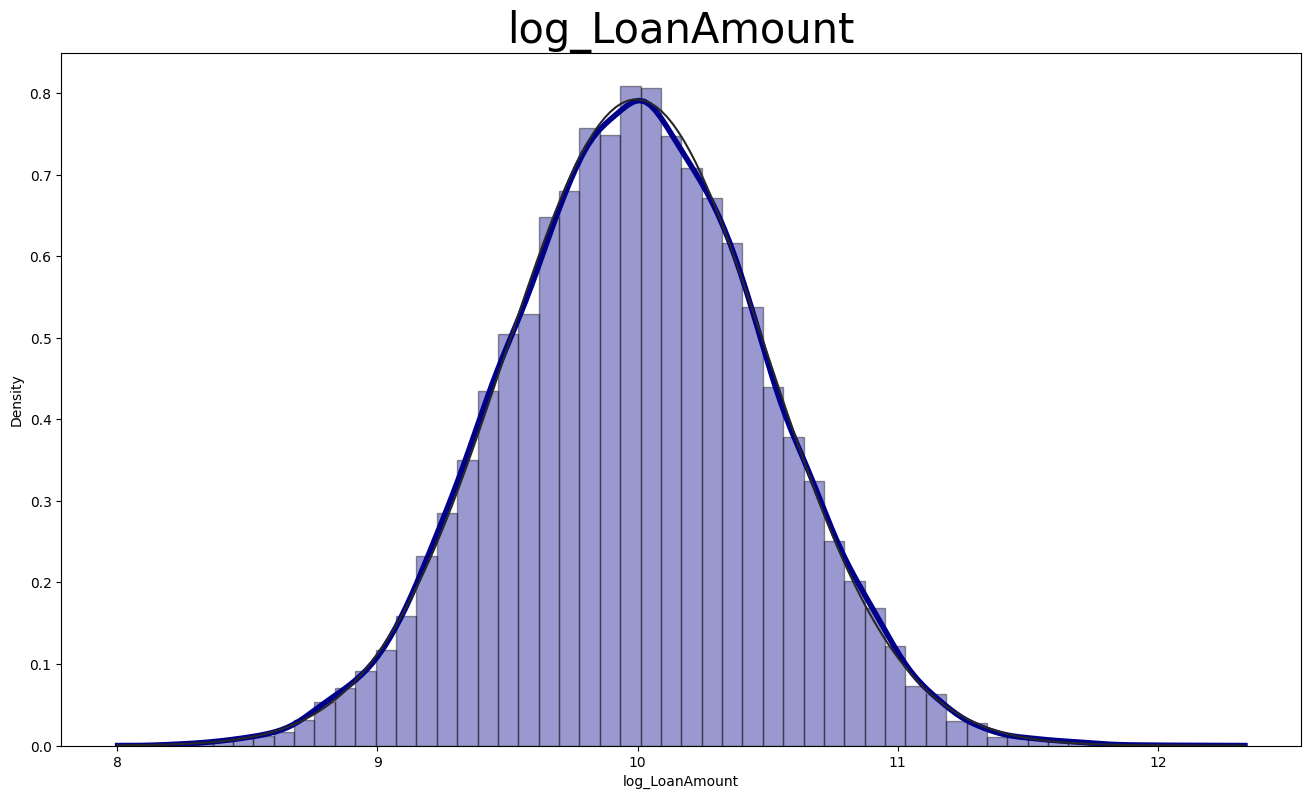

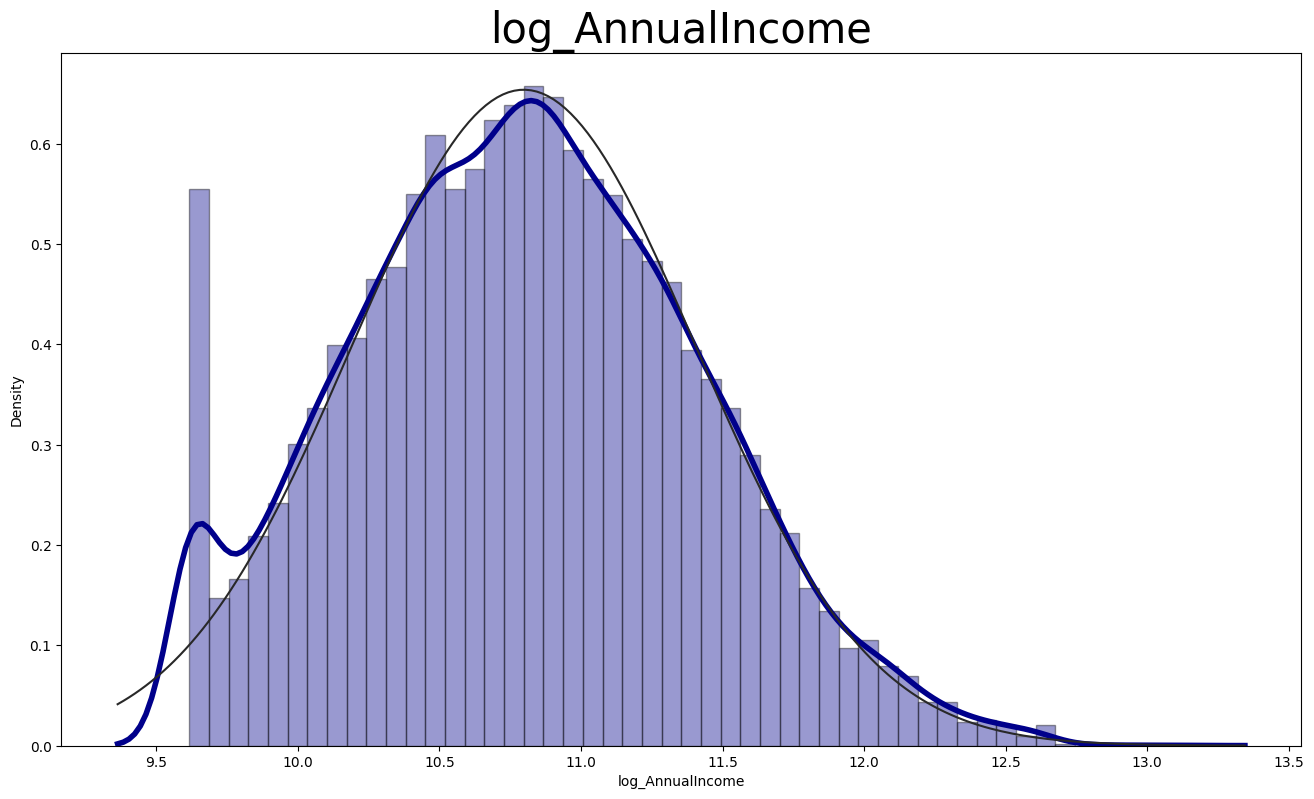

In [48]:
# Apply transformation in the variable with highest outiliers ""

df_data['log_TotalAssets'] = np.log1p(df_data['TotalAssets']) 
df_data['log_LoanAmount'] = np.log1p(df_data['LoanAmount']) 
df_data['log_AnnualIncome'] = np.log1p(df_data['AnnualIncome']) 
df_data.head(10)

a4_dims = (16, 9)
fig, axy = plt.subplots(figsize=a4_dims)
sns.distplot(df_data['log_TotalAssets'], fit=norm,hist=True, kde=True, color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4}).set_title(f'log_TotalAssets', fontdict = { 'fontsize': 30})
fig, axy = plt.subplots(figsize=a4_dims)
sns.distplot(df_data['log_LoanAmount'], fit=norm,hist=True, kde=True, color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4}).set_title(f'log_LoanAmount', fontdict = { 'fontsize': 30})
fig, axy = plt.subplots(figsize=a4_dims)
sns.distplot(df_data['log_AnnualIncome'], fit=norm,hist=True, kde=True, color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4}).set_title(f'log_AnnualIncome', fontdict = { 'fontsize': 30})

# Save the figure to PNG
# fig = plt.gcf()
# fig.savefig('/Users/elvaliu/Classes/python_project/780_assignment_shinny/log_TotalAssets.png', dpi=300)

# plt.show()

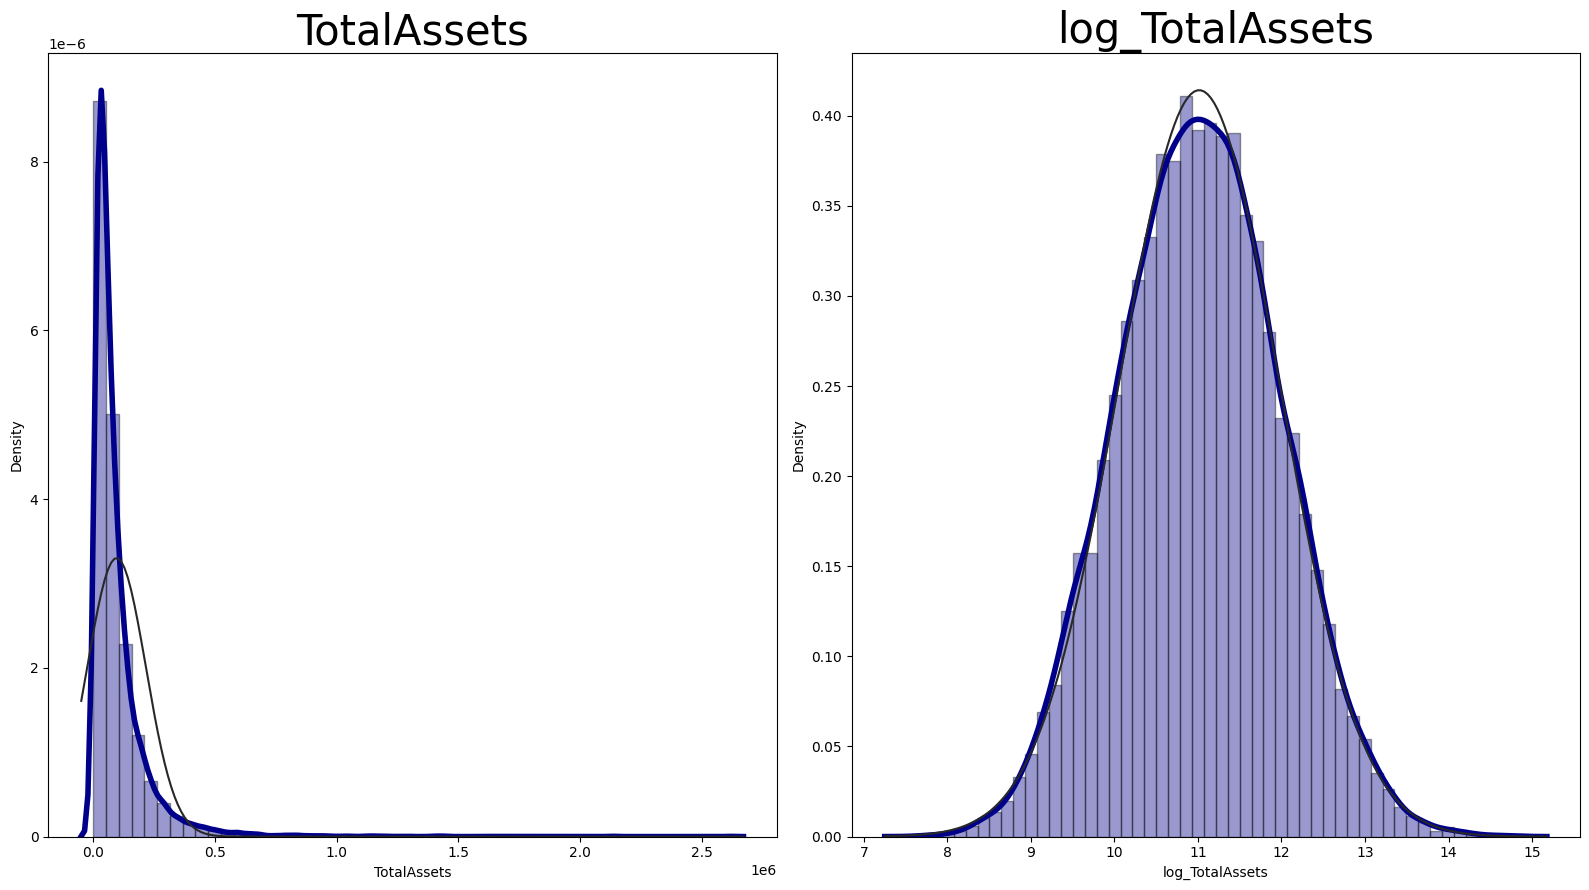

In [50]:
# set the figure dimensions and create two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 9))

# plot for 'TotalAssets'
sns.distplot(df_data['TotalAssets'], fit=norm, hist=True, kde=True, color='darkblue',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 4}, ax=ax[0])
ax[0].set_title('TotalAssets', fontdict={'fontsize': 30})

# plot for 'log_TotalAssets'
sns.distplot(df_data['log_TotalAssets'], fit=norm, hist=True, kde=True, color='darkblue',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 4}, ax=ax[1])
ax[1].set_title('log_TotalAssets', fontdict={'fontsize': 30})

# save the figure to PNG
fig = plt.gcf()
fig.savefig('/Users/elvaliu/Classes/python_project/780_assignment_shinny/log_TotalAssets.png', dpi=300)

# display
plt.tight_layout()
plt.show()


In [51]:
#df_data = df_data.drop('TotalAssets', axis=1)
df_data.head(10)

,CreditScore,TotalAssets,LoanAmount,InterestRate,AnnualIncome,RiskScore,(y) Loan Approved,log_TotalAssets,log_LoanAmount,log_AnnualIncome
0,617,146111,13152,0.227590,39948,49.0,0,11.892129,9.484405,10.595359
1,628,53204,26045,0.201077,39709,52.0,0,10.881908,10.167619,10.589358
2,570,25176,17627,0.212548,40724,52.0,0,10.133686,9.777244,10.614597
3,545,104822,37898,0.300911,69084,54.0,0,11.560028,10.542680,11.143093
4,594,244305,9184,0.175990,103264,36.0,1,12.406177,9.125327,11.545054
5,626,67914,15433,0.217601,178310,44.0,1,11.126012,9.644328,12.091284
6,564,65624,12741,0.205271,51250,50.0,0,11.091712,9.452659,10.844490
7,516,50177,19634,0.209113,97345,42.4,1,10.823332,9.885069,11.486027
8,603,29632,55353,0.291539,116841,61.0,0,10.296644,10.921504,11.668578
9,612,129664,25443,0.197271,40615,53.0,0,11.772709,10.144235,10.611917


In [52]:
df_data_log = df_data.drop(['TotalAssets', 'LoanAmount','AnnualIncome'], axis=1)

df_data_log.head(10)

,CreditScore,InterestRate,RiskScore,(y) Loan Approved,log_TotalAssets,log_LoanAmount,log_AnnualIncome
0,617,0.227590,49.0,0,11.892129,9.484405,10.595359
1,628,0.201077,52.0,0,10.881908,10.167619,10.589358
2,570,0.212548,52.0,0,10.133686,9.777244,10.614597
3,545,0.300911,54.0,0,11.560028,10.542680,11.143093
4,594,0.175990,36.0,1,12.406177,9.125327,11.545054
5,626,0.217601,44.0,1,11.126012,9.644328,12.091284
6,564,0.205271,50.0,0,11.091712,9.452659,10.844490
7,516,0.209113,42.4,1,10.823332,9.885069,11.486027
8,603,0.291539,61.0,0,10.296644,10.921504,11.668578
9,612,0.197271,53.0,0,11.772709,10.144235,10.611917


In [53]:
# from sklearn.preprocessing import StandardScaler

# # scale and centering the data
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(df_data_log)

# # convert the scaled data back into a DataFrame
# df_scaled = pd.DataFrame(data_scaled, columns=df_data_log.columns)

# # Display the first few rows of the scaled DataFrame
# df_scaled.head(10)


,CreditScore,InterestRate,RiskScore,(y) Loan Approved,log_TotalAssets,log_LoanAmount,log_AnnualIncome
0,0.890021,-0.272968,-0.227149,-0.560411,0.910668,-1.014008,-0.331806
1,1.105724,-0.901165,0.158551,-0.560411,-0.138070,0.343015,-0.341640
2,-0.031618,-0.629370,0.158551,-0.560411,-0.914819,-0.432362,-0.300276
3,-0.521852,1.464331,0.415684,-0.560411,0.565906,1.087972,0.565871
4,0.439006,-1.495584,-1.898515,1.784405,1.444316,-1.727221,1.224641
5,1.066505,-0.509639,-0.869982,1.784405,0.115342,-0.696364,2.119854
6,-0.149274,-0.801795,-0.098582,-0.560411,0.079734,-1.077064,0.076493
7,-1.090523,-0.710762,-1.075689,1.784405,-0.198879,-0.218196,1.127903
8,0.615490,1.242281,1.315651,-0.560411,-0.745648,1.840406,1.427084
9,0.791975,-0.991358,0.287118,-0.560411,0.786696,0.296568,-0.304669


In [56]:
X = df_data_log.drop('(y) Loan Approved', axis=1) 
y = df_data_log['(y) Loan Approved'] 

# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print(f"Training set size: {X_train.shape[0]} ~",X_train.shape[0]/len(df_data))
print(f"Test set size: {X_test.shape[0]} ~", X_test.shape[0]/len(df_data))

# If you need a validation set as well, you can split the training data again:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)  # 0.25 * 0.8 = 0.2

# print(f"Validation set size: {X_val.shape[0]}")

Training set size: 16000 ~ 0.8
Test set size: 4000 ~ 0.2


In [62]:
# logistic rgression

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Coefficients
coefficients = pd.Series(log_reg.coef_[0], index=[f'{column}{column}' for column in df_data_log.drop('(y) Loan Approved', axis=1).columns])
print("\nLogistic Regression Coefficients (sorted by absolute value):")
print(coefficients.abs().sort_values(ascending=False))

# Model accuracy score
print(f"\nModel Accuracy: {log_reg.score(X_test_scaled, y_test)}")

# If you want to see how each feature contributes to the model
print("\nOdds Ratios:")
odds_ratios = np.exp(coefficients)
print(odds_ratios.sort_values(ascending=False))

Confusion Matrix:
[[3031   13]
 [  30  926]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3044
           1       0.99      0.97      0.98       956

    accuracy                           0.99      4000
   macro avg       0.99      0.98      0.99      4000
weighted avg       0.99      0.99      0.99      4000


Logistic Regression Coefficients (sorted by absolute value):
RiskScoreRiskScore                  6.699696
log_AnnualIncomelog_AnnualIncome    3.854659
InterestRateInterestRate            2.465755
CreditScoreCreditScore              1.858954
log_LoanAmountlog_LoanAmount        1.856596
log_TotalAssetslog_TotalAssets      0.002855
dtype: float64

Model Accuracy: 0.98925

Odds Ratios:
log_AnnualIncomelog_AnnualIncome    47.212537
log_TotalAssetslog_TotalAssets       0.997149
log_LoanAmountlog_LoanAmount         0.156203
CreditScoreCreditScore               0.155835
InterestRateInterestRate          

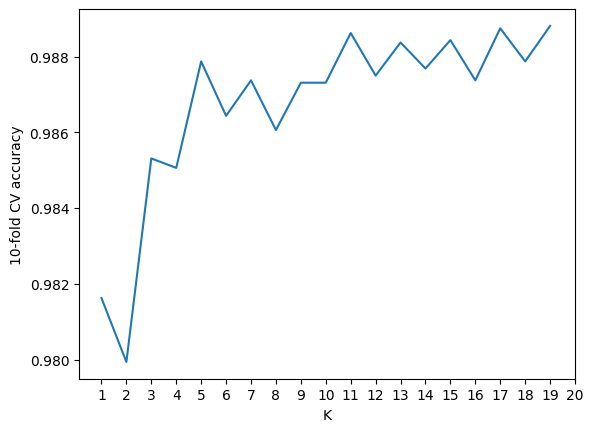

In [72]:

# Plot K versus 10-fold CV accuracy.
k_range = range(1, 20)
cv_scores = [] 

for k in k_range:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores_k = cross_val_score(knn_cv, X_train_scaled, y_train, cv=10)
    cv_scores.append(np.mean(cv_scores_k))
plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('10-fold CV accuracy')
plt.xticks(range(1,21))
plt.show()

# I will choose K= 11 

In [114]:
# KNN
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled,y_train)

pred_knn = knn.predict(X_test_scaled)
pred_knn[1:5]

# accuracy on the test set
print("accuracy is: ", round(metrics.accuracy_score(y_test, pred_knn),5))
print("missclasification rate of KNN claasifier is: ", round(1-metrics.accuracy_score(y_test, pred_knn),5))
# confusion matrix
print(metrics.confusion_matrix(y_test, pred_knn).T)

cm_knn = confusion_matrix(y_test, pred_knn)
tn_k, fp_k, fn_k, tp_k = cm_knn.ravel()

sensitivity_k = tp_k / (tp_k + fn_k)
specificity_k = tn_k / (tn_k + fp_k)

print(f"Sensitivity: {round(sensitivity_k,4)}")
print(f"Specificity: {round(specificity_k,4)}")

accuracy is:  0.98675
missclasification rate of KNN claasifier is:  0.01325
[[3032   41]
 [  12  915]]
Sensitivity: 0.9571
Specificity: 0.9961


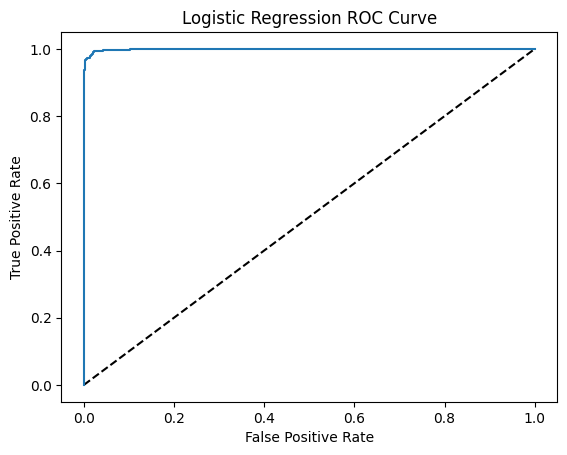

0.9989976165472649


In [93]:
# Logistic Regression 
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:,1]
fpr, tpr,thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print(roc_auc_score(y_test, y_pred_prob))


In [102]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {round(optimal_threshold,5)}')

Optimal Threshold: 0.11839


In [113]:
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_optimal)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
missClassificationRate_logr= (fn + fp) / (tn + fp + fn + tp )

print(f"Sensitivity: {round(sensitivity,4)}")
print(f"Specificity: {round(specificity,4)}")
print(f"Miss-classification rate for logistic classifier is: {round(missClassificationRate_logr,5)}")

Sensitivity: 0.9927
Specificity: 0.9777
Miss-classification rate for logistic classifier is: 0.01875


Best C (shrinkage value): 10
Accuracy with L1 shrinkage: 0.98925


In [128]:
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=10, max_iter=1500)
lasso_cv.fit(X_train_scaled, y_train)
print("best alpha value: ",lasso_cv.alpha_)

m_lasso = Lasso(alpha=lasso_cv.alpha_)
m_lasso.fit(X_train_scaled, y_train) 
m_lasso_pre_logOdds = m_lasso.predict(X_test_scaled)

column_names = X_train.columns
coefficients_df = pd.DataFrame({
    'Feature': column_names,  # the original column names
    'Coefficient': m_lasso.coef_  # Lasso coefficients
})
print(coefficients_df)

# RiskScore has the most significant infulunce on loan approval decisions
# AnnualIncome has positive impacet of loan approval

best alpha value:  0.0001
            Feature  Coefficient
0       CreditScore    -0.057584
1      InterestRate    -0.069632
2         RiskScore    -0.258789
3   log_TotalAssets    -0.011258
4    log_LoanAmount    -0.051299
5  log_AnnualIncome     0.121432


In [127]:
# accuracy without Lasso
accuracy_no_lasso = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy without Lasso: {accuracy_no_lasso}")

# accuracy with Lasso
y_pred_optimal_lasso = (y_pred_prob >= m_lasso_pre_logOdds).astype(int)
accuracy_lasso = accuracy_score(y_test, y_pred_optimal_lasso)
print(f"Accuracy with Lasso: {accuracy_lasso}")

Accuracy without Lasso: 0.98125
Accuracy with Lasso: 0.7165


In [129]:
# Generative AI Solution for Lasso Shrinkage:
# Lasso (L1) regularization 
# predicting binary outcome 
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Define a range of C values (inverse of regularization strength)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform cross-validation to find the best shrinkage value (C)
grid_search = GridSearchCV(log_reg_l1, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best model with L1 shrinkage
best_model_l1 = grid_search.best_estimator_
print(f"Best C (shrinkage value): {grid_search.best_params_['C']}")

# Train the model with the best C value
log_reg_l1_best = LogisticRegression(penalty='l1', C=grid_search.best_params_['C'], solver='liblinear', random_state=42)
log_reg_l1_best.fit(X_train_scaled, y_train)

# Predict on the hold-out test set
y_pred_l1 = log_reg_l1_best.predict(X_test_scaled)

# Evaluate the performance on the test set
#from sklearn.metrics import accuracy_score
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f"Accuracy with L1 shrinkage: {accuracy_l1}")


Best C (shrinkage value): 10
Accuracy with L1 shrinkage: 0.98925
